In [1]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import glob
import scipy
import re

In [3]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
cm = 1/2.54
fig_folder = './Figure_2_exports'
data_folder = '../all_data/Figure_2_data'

In [18]:
data = pd.read_excel(data_folder+'/Supp_fig-salt_screen.xlsx')
data

,exp_id,K,Mg,deGFP,mean
0,219,170,11.0,5,5948.000000
1,219,160,10.0,5,6975.666667
2,219,190,9.0,5,7081.666667
3,219,220,9.0,5,7333.666667
4,219,220,10.0,5,8067.000000
...,...,...,...,...,...
321,222,260,20.0,5,20478.000000
322,222,135,15.0,5,20946.333333
323,222,210,15.0,5,22439.666667
324,222,160,15.0,5,23648.333333


In [19]:
def get_labels(lst):
    return [((lst[i+1]-lst[i])/2) + lst[i] for i in range(len(lst)-1)]

Mg_bins = list(np.arange(0,60,2.5))
Mg_labels = get_labels(Mg_bins)
K_bins = list(np.arange(50,350,25))
K_labels = get_labels(K_bins)

data['Mg_cate'] = pd.cut(data['Mg'], bins=Mg_bins,labels=Mg_labels)
data['K_cate'] = pd.cut(data['K'], bins=K_bins,labels=K_labels)
data = data.rename(columns={'mean':'rep_avg'})
data


,exp_id,K,Mg,deGFP,rep_avg,Mg_cate,K_cate
0,219,170,11.0,5,5948.000000,11.25,162.5
1,219,160,10.0,5,6975.666667,8.75,162.5
2,219,190,9.0,5,7081.666667,8.75,187.5
3,219,220,9.0,5,7333.666667,8.75,212.5
4,219,220,10.0,5,8067.000000,8.75,212.5
...,...,...,...,...,...,...,...
321,222,260,20.0,5,20478.000000,18.75,262.5
322,222,135,15.0,5,20946.333333,13.75,137.5
323,222,210,15.0,5,22439.666667,13.75,212.5
324,222,160,15.0,5,23648.333333,13.75,162.5


In [20]:
stdevs = pd.DataFrame(data.groupby(['Mg_cate','K_cate'],observed=True).agg('std')['rep_avg'],).rename(columns={'rep_avg':'stdev'})
means = pd.DataFrame(data.groupby(['Mg_cate','K_cate'],observed=True).agg('mean')['rep_avg']).rename(columns={'rep_avg':'mean'})
calcs = means.join(stdevs)
calcs['percent'] = calcs['stdev'] / calcs['mean']

calcs.describe()
data = data.set_index(['Mg_cate','K_cate']).join(calcs)
data = data.reset_index()
data

,Mg_cate,K_cate,exp_id,K,Mg,deGFP,rep_avg,mean,stdev,percent
0,11.25,162.5,219,170,11.0,5,5948.000000,19288.777778,9758.969294,0.505940
1,8.75,162.5,219,160,10.0,5,6975.666667,11118.166667,3550.508488,0.319343
2,8.75,187.5,219,190,9.0,5,7081.666667,11179.875000,3318.825806,0.296857
3,8.75,212.5,219,220,9.0,5,7333.666667,8886.166667,4298.376201,0.483715
4,8.75,212.5,219,220,10.0,5,8067.000000,8886.166667,4298.376201,0.483715
...,...,...,...,...,...,...,...,...,...,...
321,18.75,262.5,222,260,20.0,5,20478.000000,18735.000000,2464.974239,0.131571
322,13.75,137.5,222,135,15.0,5,20946.333333,22676.866667,7812.981809,0.344535
323,13.75,212.5,222,210,15.0,5,22439.666667,17608.666667,3508.954841,0.199274
324,13.75,162.5,222,160,15.0,5,23648.333333,23167.619048,6636.230111,0.286444


,mean,stdev,percent
count,326.000000,235.000000,235.000000
mean,15159.524540,5016.133020,0.302717
std,7666.897285,3648.425220,0.196034
min,91.166667,10.842304,0.001296
25%,9043.333333,1985.712788,0.182496
50%,17358.916667,4384.062043,0.287780
75%,20893.518519,6918.821452,0.393250
max,31133.833333,14293.044561,0.979517


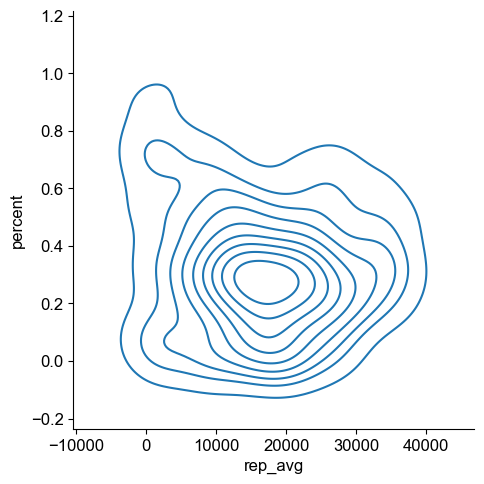

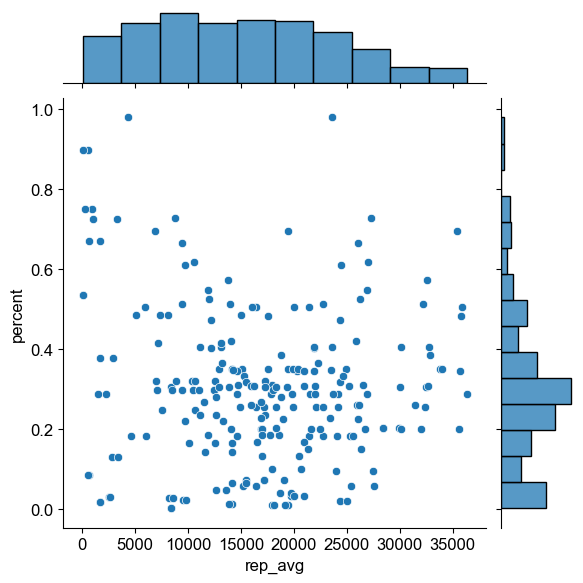

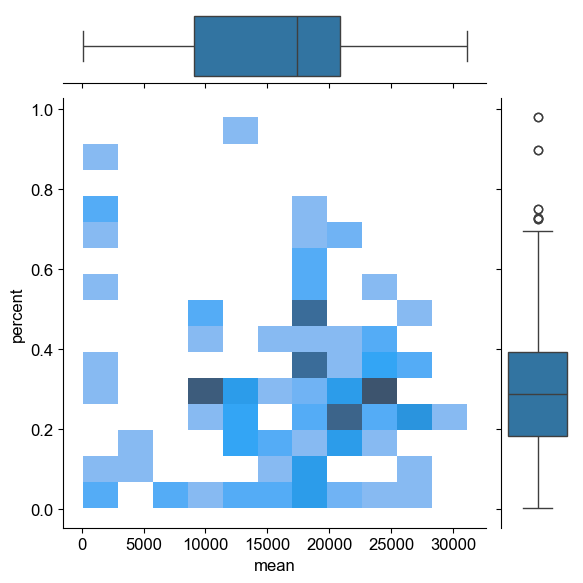

In [22]:
temp = data.copy()
# temp = temp.fillna(0)

sns.displot(data=temp,x='rep_avg',y='percent',kind='kde')
sns.jointplot(data=temp,x='rep_avg',y='percent')

g = sns.JointGrid(data=temp,x='mean',y='percent')
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

temp[['mean','stdev','percent']].describe()

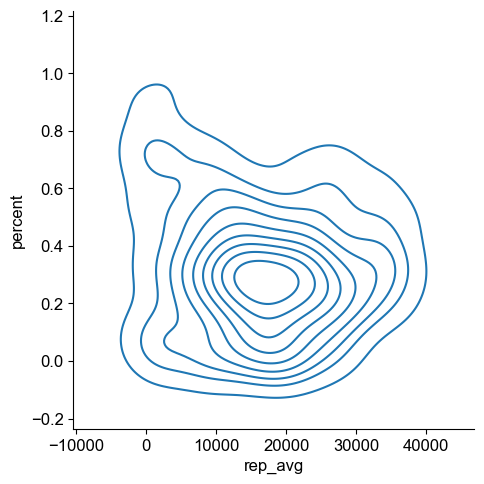

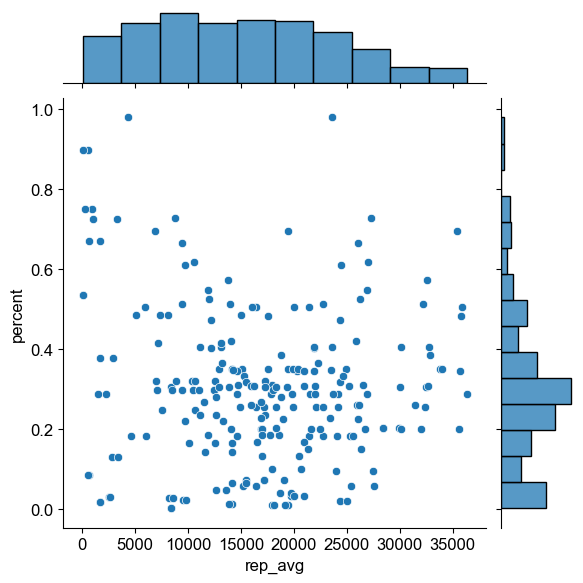

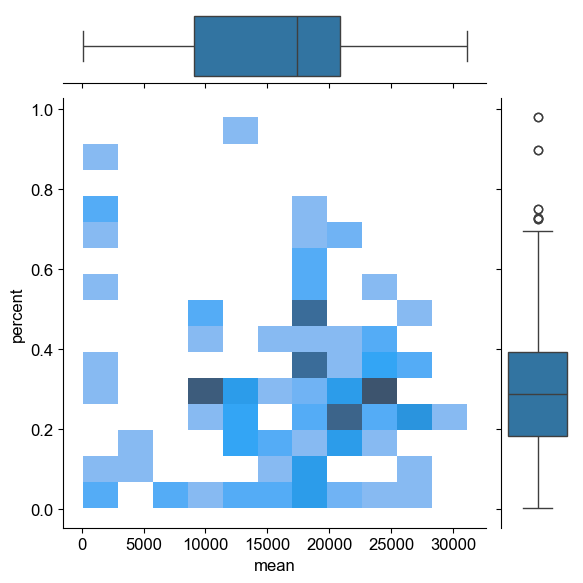

In [23]:
temp = data.copy()
temp = temp.dropna()
sns.displot(data=data,x='rep_avg',y='percent',kind='kde')
sns.jointplot(data=data,x='rep_avg',y='percent')

g = sns.JointGrid(data=data,x='mean',y='percent')
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

data[['mean','stdev','percent']].describe()
plt.show()

In [24]:
temp = data.groupby(['Mg_cate','K_cate']).agg(len).reset_index()[['Mg_cate','K_cate','rep_avg']]
temp

C:\Users\conar\AppData\Local\Temp\ipykernel_9724\4161801202.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp = data.groupby(['Mg_cate','K_cate']).agg(len).reset_index()[['Mg_cate','K_cate','rep_avg']]


,Mg_cate,K_cate,rep_avg
0,1.25,62.5,NaN
1,1.25,87.5,NaN
2,1.25,112.5,NaN
3,1.25,137.5,NaN
4,1.25,162.5,NaN
...,...,...,...
248,56.25,212.5,NaN
249,56.25,237.5,NaN
250,56.25,262.5,NaN
251,56.25,287.5,NaN


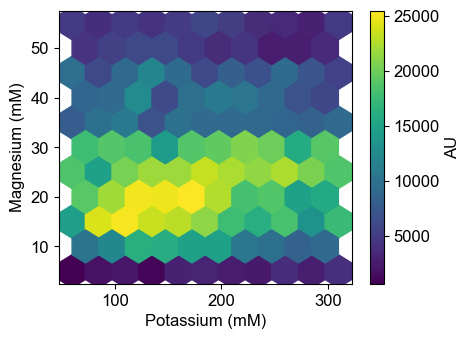

In [25]:
fig, axs = plt.subplots(ncols=1, sharey=True, figsize=(12*cm, 9*cm))
ax = axs
hb = ax.hexbin(x=data['K'],y=data['Mg'],C=data['mean'],gridsize=(10,5),cmap='viridis')
plt.xlabel('Potassium (mM)')
plt.ylabel('Magnesium (mM)')

cb = fig.colorbar(hb, ax=ax)
cb.set_label('AU')
plt.show()
# fig.savefig(f'{fig_folder}/Supp_fig-salt_screen_deGFP.svg',format='svg',dpi=300)

In [15]:
data[['Mg','K','mean']].rename(columns={'mean':'deGFP'}).set_index('Mg').to_excel(f'{data_folder}/Supp_fig-salt_screen_deGFP.xlsx')

In [11]:
data.value_counts('Mg')

Mg
10.0    29
20.0    29
5.0     22
15.0    22
30.0    22
25.0    22
12.0    14
14.0    14
22.5    11
50.0    11
45.0    11
40.0    11
35.0    11
27.5    11
55.0    11
7.5     11
17.5    11
12.5    11
22.0     7
16.0     7
13.0     7
11.0     7
9.0      7
18.0     7
dtype: int64

In [27]:
low_mg = data[data['Mg'] < 7]['mean'].mean()
opt_mg = data[data['Mg'] == 15]['mean'].mean()
print(round(low_mg/opt_mg*100,3))
print(low_mg,opt_mg)

7.852
1502.8484848484848 19140.00543530544


In [12]:
data[data['Mg'] == 15]['mean'].mean()

19140.00543530544

In [19]:
data[data['Mg'].between(6,10)]['mean'].mean()

8887.787234042555

In [22]:
opt = data[data['Mg'].between(12.5,22.5)]['mean'].mean()
opt

21198.341049382718

In [28]:
large = data[data['Mg'].between(7.5,20)]['mean'].mean()
large

17404.36931818182

In [29]:
abs(large - opt) / opt

0.17897493593308217